# Ford GoBike 2008 Investigation

In [1]:
# import packages
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
folder = r'data/'
files = glob.glob(folder + '*-fordgobike-tripdata.csv')

dfs = (pd.read_csv(file) for file in files)
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No
1,63587,2018-12-31 19:00:32.1210,2019-01-01 12:40:19.3660,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4281,Customer,1995.0,Male,No
2,64169,2018-12-31 15:09:01.0820,2019-01-01 08:58:30.0910,NaN,NaN,37.400000,-121.940000,NaN,NaN,37.400000,-121.940000,4267,Customer,1988.0,Male,No
3,30550,2018-12-31 19:26:20.7750,2019-01-01 03:55:30.7930,13.0,Commercial St at Montgomery St,37.794231,-122.402923,19.0,Post St at Kearny St,37.788975,-122.403452,5422,Subscriber,1986.0,Male,Yes
4,2150,2018-12-31 23:59:12.0970,2019-01-01 00:35:02.1530,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,4820,Customer,NaN,NaN,No
5,2149,2018-12-31 23:59:11.8820,2019-01-01 00:35:01.6850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,5549,Subscriber,1982.0,Male,Yes
6,2502,2018-12-31 23:46:24.9430,2019-01-01 00:28:07.3560,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4706,Customer,1973.0,Male,No
7,8202,2018-12-31 22:11:22.5060,2019-01-01 00:28:05.1730,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,16.0,Steuart St at Market St,37.794130,-122.394430,5518,Customer,1995.0,Male,No
8,2170,2018-12-31 23:47:19.2100,2019-01-01 00:23:30.1300,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4800,Customer,1999.0,Female,No
9,3645,2018-12-31 23:22:41.2860,2019-01-01 00:23:27.2680,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,4747,Customer,1999.0,Male,No


In [4]:
df.shape

(1863721, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [7]:
df.start_time = pd.to_datetime(df.start_time)

In [8]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

## When are most trips taken in terms of time of day, day of the week, or month of the year?

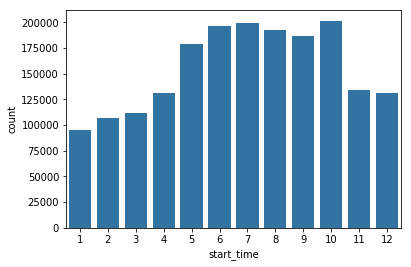

In [9]:
base_color = sns.color_palette()[0]
sns.countplot(df.start_time.dt.month, color=base_color)

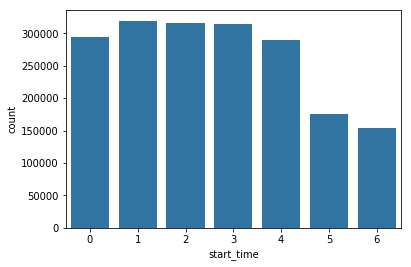

In [10]:
sns.countplot(df.start_time.dt.dayofweek, color=base_color);

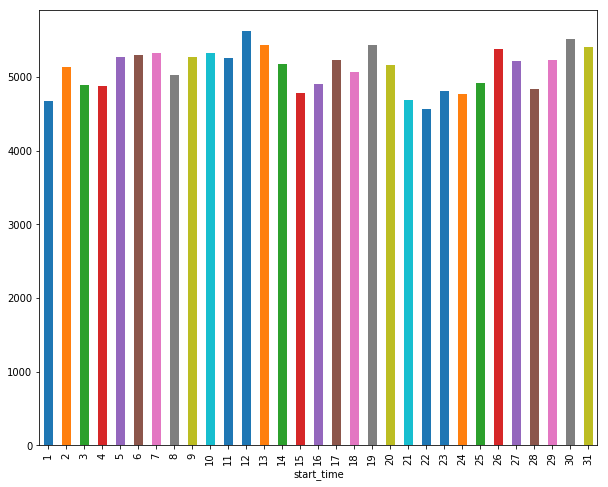

In [21]:
plt.figure(figsize=(10,8))
index = pd.DatetimeIndex(df.start_time)
df1 = df.reindex(index=index)
df1 = df1.resample('D').size()
df1.groupby(df1.index.day).mean().plot('bar') 

## How long does the average trip take?

In [12]:
df.duration_sec.mean()

857.3025710393348

## Does the above depend on if a user is a subscriber or customer?

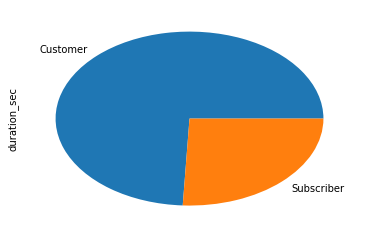

In [13]:
df.groupby('user_type').duration_sec.mean().plot('pie')

## what is the 10 top station that trips start from ?

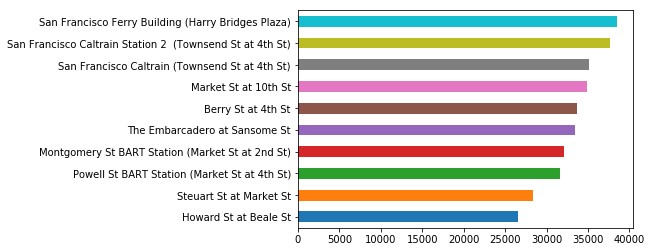

In [14]:
df.start_station_name.value_counts()[:10].sort_values().plot('barh');

## What is the top 10 stations that trips start from ?

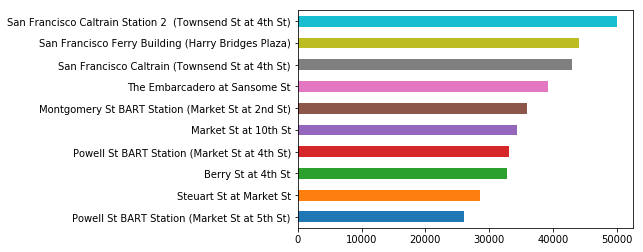

In [15]:
df.end_station_name.value_counts()[:10].sort_values().plot('barh');

## Gender distripution ?

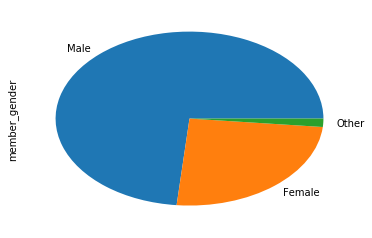

In [16]:
df.member_gender.value_counts().plot('pie');

## Time usage by gender

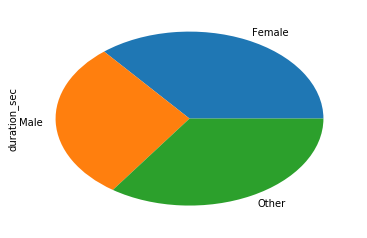

In [17]:
df.groupby('member_gender').duration_sec.mean().plot('pie')

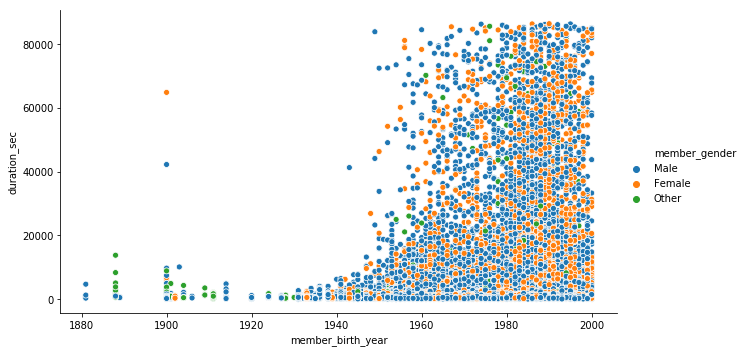

In [18]:
bins = np.arange(1900,2010,10)
sns.relplot('member_birth_year', 'duration_sec',hue='member_gender', data=df,aspect=16/9)

## most used bike?

In [19]:
df.groupby('bike_id').duration_sec.sum().sort_values(ascending=False)[:10] //3600

bike_id
3961    330
3235    324
4452    294
1181    291
2970    288
2237    285
3570    283
3614    278
1298    273
2375    271
Name: duration_sec, dtype: int64

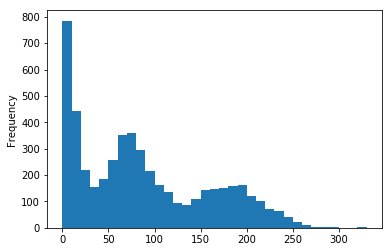

In [20]:
bins = np.arange(0, 330+10, 10)
(df.groupby('bike_id').duration_sec.sum() //3600).plot('hist', bins=bins);